In [77]:
##Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ 
##and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

##Assess the validity of the Z-test: If the samples are drawn from the distribution you are 
##testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and 
##standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book 
##or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

#Assignment 1 in Hw3 using skelleton notebook 

from __future__ import print_function
import numpy as np
import pylab as pl
# this package sets up pretty plots
import seaborn as sns
from scipy.optimize import curve_fit, minimize
import math  
%pylab inline
import scipy 



Populating the interactive namespace from numpy and matplotlib


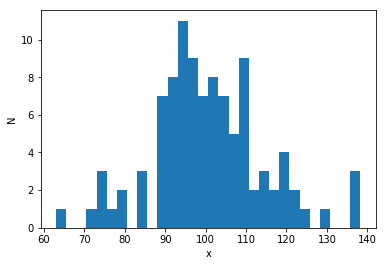

In [3]:
np.random.seed(10)

distributions = ['chisq']
mymean=100 #defining a mean 

# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

md = {}
# md is an empty dictionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
# generating the population chi-square distribution

pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')




In [4]:
md['chisq']

array([ 119.30883203,  109.76005976,  108.3509054 ,   89.52554522,
        103.12289126,  100.87118435,  105.56266249,  117.27321126,
        102.59082933,  105.74053615,  121.76137958,   84.87765952,
        103.13096357,  136.88388181,  100.73739719,  120.36962241,
         95.61295813,   91.79028685,  101.21561122,   92.77215768,
        105.08171207,   94.65002631,  108.93287059,   94.46944341,
         88.41879174,   96.36543696,  107.5139419 ,   97.26991195,
         91.91644198,  109.65284939,  137.05389236,  112.8341112 ,
         96.09655137,   92.42800021,   98.19430453,   92.05816033,
         94.31104077,   97.6249711 ,   96.32273076,  113.93657303,
         79.55428984,  108.33992351,   85.31847992,   88.50466977,
         75.40028407,   96.22632589,   98.40810105,   72.21467706,
        102.4272446 ,   73.79087679,   98.46324136,   89.08167455,
         92.69203572,  100.60142142,  100.99836034,   74.80053719,
         97.31235877,   93.79948382,   95.21959744,  111.77481

In [5]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.67, standard deviation: 13.67


In [ ]:
#Lets create 100 = N chisq distributions 

In [7]:
sample_size = md['chisq']
new_array = []

for i in range(0, 100, 10):
    x = i
    y = x + 10
    new_array.append(sample_size[x:y])

print("Index", "Mean", "Standard-Deviation")
for index, value in enumerate(new_array):
    print(index, value.mean(), value.std())

Index Mean Standard-Deviation
0 106.210665727 8.0081365027
1 104.915191796 15.4489663154
2 99.4271426303 7.28914358667
3 103.086033567 13.5171378618
4 88.0184872508 12.1920431776
5 95.4743526089 9.02054686675
6 104.781737566 16.0679682528
7 108.975844554 13.2858173076
8 97.7584536693 14.0786948908
9 98.0652564352 11.0286924894


In [28]:
type(new_array[0])

numpy.ndarray

In [ ]:
#pl.hist(md['chisq'], bins = 30)
#pl.ylabel('N')
#pl.xlabel('x')

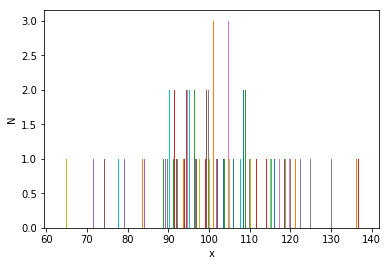

In [8]:
pl.hist(new_array, bins = 30)
pl.ylabel('N')
pl.xlabel('x')

[ 119.30883203  109.76005976  108.3509054    89.52554522  103.12289126
  100.87118435  105.56266249  117.27321126  102.59082933  105.74053615]


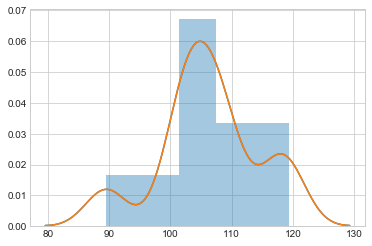

In [63]:
#pl.figure(1)
#pl.plot([1,2,3,4], [1,7,3,5])
#pl.show()

data = new_array[0]
print(data)
sns.set_style('whitegrid')
#sns.kdep(data, bw=0.5)
sns.distplot(data, hist=True)
sns.distplot(data, hist=False)

In [ ]:
#z= pop_mean - sample_mean / population_sd


In [9]:
print(md['chisq'].mean())

100.67131658


In [10]:
md['chisq'].mean(), md['chisq'].std()

(100.67131658037727, 13.665683880149389)

In [ ]:
for index in new_array:
    print new_array

In [13]:
# Z statistics 

population_mean = md['chisq'].mean()
first_sample_mean = new_array[0].mean()
first_standard_deviation = new_array[0].std()

N = md['chisq'].size

In [28]:
Z_1 = (population_mean - first_sample_mean)/ (first_standard_deviation/ (math.sqrt(N)))

In [29]:
print(Z_1)

-6.91715125544


In [41]:
second_sample_mean = new_array[1].mean()
second_standard_deviation = new_array[1].std() 
    
Z_2 = (population_mean - second_sample_mean)/ (second_standard_deviation/ (math.sqrt(N)))
print (Z_2)

-2.74702858997


In [45]:
third_sample_mean = new_array[2].mean()
third_standard_deviation = new_array[2].std() 
    
Z_3 = (population_mean - third_sample_mean)/ (third_standard_deviation/ (math.sqrt(N)))
print (Z_3)

1.7068863238


In [44]:
fourth_sample_mean = new_array[3].mean()
fourth_standard_deviation = new_array[3].std() 
    
Z_4 = (population_mean - fourth_sample_mean)/ (fourth_standard_deviation/ (math.sqrt(N)))
print (Z_4)

-1.78641145104


In [46]:
fifth_sample_mean = new_array[4].mean()
fifth_standard_deviation = new_array[4].std() 
    
Z_5 = (population_mean - fifth_sample_mean)/ (fifth_standard_deviation/ (math.sqrt(N)))
print (Z_5)

10.3779400592


In [47]:
sixth_sample_mean = new_array[5].mean()
sixth_standard_deviation = new_array[5].std() 
    
Z_6 = (population_mean - sixth_sample_mean)/ (sixth_standard_deviation/ (math.sqrt(N)))
print (Z_6)

5.76125156078


In [48]:
seventh_sample_mean = new_array[6].mean()
seventh_standard_deviation = new_array[6].std() 
    
Z_7 = (population_mean - seventh_sample_mean)/ (seventh_standard_deviation/ (math.sqrt(N)))
print (Z_7)

-2.55814607105


In [49]:
eigth_sample_mean = new_array[7].mean()
eigth_standard_deviation = new_array[7].std() 
    
Z_8 = (population_mean - eigth_sample_mean)/ (eigth_standard_deviation/ (math.sqrt(N)))
print (Z_8)

-2.55814607105


In [52]:
ninth_sample_mean = new_array[8].mean()
ninth_standard_deviation = new_array[8].std() 
    
Z_9 = (population_mean - ninth_sample_mean)/ (ninth_standard_deviation/ (math.sqrt(N)))
print (Z_9)

2.06898646054


In [54]:
tenth_sample_mean = new_array[9].mean()
tenth_standard_deviation = new_array[9].std() 
    
Z_10 = (population_mean - tenth_sample_mean)/ (tenth_standard_deviation/ (math.sqrt(N)))
print (Z_10)

2.36298196515


In [75]:
z_array = np.array([Z_1, Z_2, Z_3, Z_4, Z_5, Z_6, Z_7, Z_8, Z_9, Z_10])
    
print (z_array)
print(z_array.mean(), z_array.std())

[ -6.91715126  -2.74702859   1.70688632  -1.78641145  10.37794006
   5.76125156  -2.55814607  -2.55814607   2.06898646   2.36298197]
0.571116293088 4.71256200976


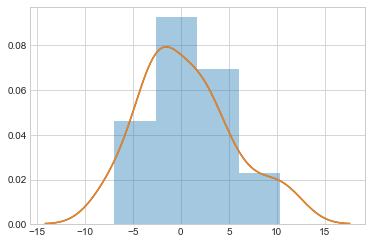

In [72]:
sns.set_style('whitegrid')
#sns.kdep(data, bw=0.5)
sns.distplot(z_array, hist=True)
sns.distplot(z_array, hist=False)


In [26]:
print(population_mean)
print(first_sample_mean)
print(first_standard_deviation)
print(math.sqrt(N))

100.67131658
106.210665727
8.0081365027
10.0


In [78]:
scipy.stats.anderson(z_array, dist='norm')

AndersonResult(statistic=0.3432575506307245, critical_values=array([ 0.501,  0.57 ,  0.684,  0.798,  0.95 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))